### 有限射影平面(finite projective plane)神経衰弱
**有限射影平面神経衰弱**とは, 
「それまでに取られたn組のトランプと矛盾しない有限射影平面上の直線をなすトランプの組を取る」というゲームです。
簡単にいうと、
+ 4枚すべての数が異なる
+ それまでの組(4枚1組)のいずれ(の組)とも、1枚だけ数が一致する

ような4枚組を取る神経衰弱です。

In [1]:
#n種類のカードがk枚。k枚ずつ引く。打ち切りはm回
function fpp(n=13,k=4,m=10^6) 
    X = [] # Xは1がk枚，2がk枚...nがk枚のリスト
    for i = 1:n , _=1:k
        push!(X,i)
    end
    Z = [] # Zは取るのが成功した組(Y)のリスト
    t = 0 #回数のカウンタ。m回で打ち切り
    while length(X) ≥ k
        Y= rand(X,k)
        t += 1
        if Y |> unique |> length == Y |> length
            if X |> length == k*n
                push!(Z,Y)
                for y in Y
                    for i = 1:length(X)
                        if X[i] == y
                            deleteat!(X,i)
                            break
                        end
                    end
                end
            elseif all(z -> length(z ∩ Y) == 1 , Z)
                push!(Z,Y)
                for y in Y
                    for i = 1:length(X)
                        if X[i] == y
                            deleteat!(X,i)
                            break
                        end
                    end
                end
            end
        end
        if  t == m
            break
        end
    end
    t,Z|>length,Z,X
end

result = fpp(13,4,10^6)

(1035, 13, Any[Any[10, 7, 8, 11], Any[8, 4, 1, 13], Any[11, 12, 4, 3], Any[11, 2, 6, 13], Any[5, 13, 7, 12], Any[1, 2, 10, 12], Any[3, 8, 5, 2], Any[7, 1, 6, 3], Any[10, 3, 13, 9], Any[6, 10, 5, 4], Any[4, 2, 9, 7], Any[5, 1, 11, 9], Any[8, 6, 12, 9]], Any[])

In [2]:
result[3]

13-element Vector{Any}:
 Any[11, 4, 2, 7]
 Any[4, 9, 13, 10]
 Any[11, 1, 9, 8]
 Any[11, 12, 10, 5]
 Any[5, 8, 13, 7]
 Any[5, 6, 9, 2]
 Any[1, 7, 6, 10]
 Any[5, 4, 1, 3]
 Any[8, 10, 3, 2]
 Any[4, 8, 6, 12]
 Any[2, 13, 1, 12]
 Any[12, 3, 7, 9]
 Any[11, 6, 3, 13]

In [3]:
#完成したリストをチェックする。
#完成したリストからランダムに選んでいけば，有限回で神経衰弱が終了するはず。
function check_fpp(P,n=13,k=4,m=10^6)
    X = [] # Xは1がk枚，2がk枚...nがk枚のリスト
    for i = 1:n , _=1:k
        push!(X,i)
    end
    Z = [] # Zは取るのが成功した組(Y)のリスト
    t = 0 #回数のカウンタ。m回で打ち切り
    while length(X) ≥ k
        Y= rand(P)
        t += 1
        if Y |> unique |> length == Y |> length
            if X |> length == k*n
                push!(Z,Y)
                for y in Y
                    for i = 1:length(X)
                        if X[i] == y
                            deleteat!(X,i)
                            break
                        end
                    end
                end
            elseif all(z -> length(z ∩ Y) == 1 , Z)
                push!(Z,Y)
                for y in Y
                    for i = 1:length(X)
                        if X[i] == y
                            deleteat!(X,i)
                            break
                        end
                    end
                end
            end
        end
        if  t == m
            break
        end
    end
    t,Z|>length,Z,X
end
 
check_fpp(result[3])

(36, 13, Any[Any[11, 1, 9, 8], Any[5, 8, 13, 7], Any[11, 12, 10, 5], Any[11, 4, 2, 7], Any[4, 8, 6, 12], Any[4, 9, 13, 10], Any[5, 4, 1, 3], Any[11, 6, 3, 13], Any[2, 13, 1, 12], Any[8, 10, 3, 2], Any[1, 7, 6, 10], Any[12, 3, 7, 9], Any[5, 6, 9, 2]], Any[])

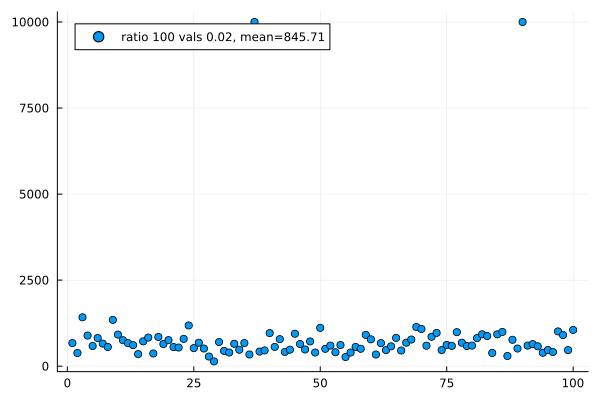

In [4]:
#トランプを神経衰弱を100回行って，「終了するか？」「終了するとすれば，平均はどのくらいか？」を調べてみる。
using Plots,Statistics
A = [fpp(13,4,10^4) for _=1:100]
B =  [A[i][1] for i = 1:100]

scatter(B,label="ratio 100 vals $(count(x -> x == 10^4 , B)/100), mean=$(mean(B))")

# やっぱり，100回行うと1，2回終わらないものが存在する。

In [5]:
findmax(B)
#37番目が終わっていない。

(10000, 37)

In [6]:
Y = A[37][3]
#終わらない場合のリスト

5-element Vector{Any}:
 Any[3, 7, 6, 4]
 Any[7, 11, 9, 12]
 Any[2, 8, 11, 4]
 Any[8, 9, 10, 3]
 Any[2, 12, 10, 6]

In [7]:
#この時点で，1~13は全て残っているが，どのように4数を選んでも，リストに追加できない。
#このことをチェックする
using Combinatorics
X = [i for i = 1:13] |> X -> combinations(X,4) |>collect
k = 0
for x in X
    if all(y -> x ∩ y |> length == 1, Y)
         k += 1
    end
end
k
#1つも出てこない。

0

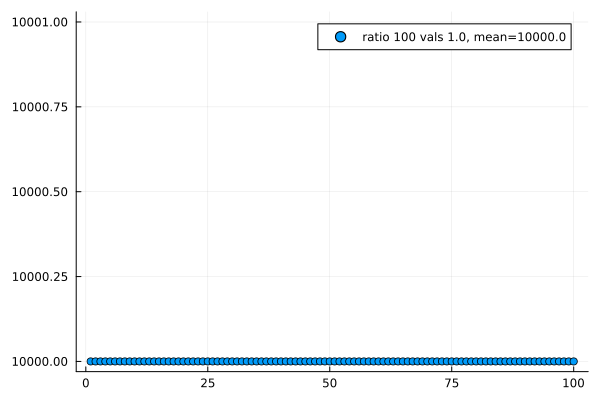

In [8]:
#他の数字でもやってみる。
#12種類のカードが4枚。4枚ずつ引く。打ち切りは10^4回
A = [fpp(12,4,10^4) for _=1:100]
B =  [A[i][1] for i = 1:100]

scatter(B,label="ratio 100 vals $(count(x -> x == 10^4 , B)/100), mean=$(mean(B))")

# 全部失敗。できない。

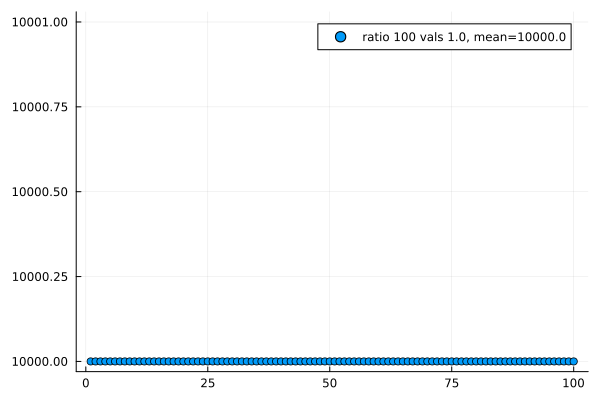

In [9]:
#他の数字でもやってみる。
#11種類のカードが4枚。4枚ずつ引く。打ち切りは10^4回
A = [fpp(11,4,10^4) for _=1:100]
B =  [A[i][1] for i = 1:100]

scatter(B,label="ratio 100 vals $(count(x -> x == 10^4 , B)/100), mean=$(mean(B))")

# 全部失敗。できない。

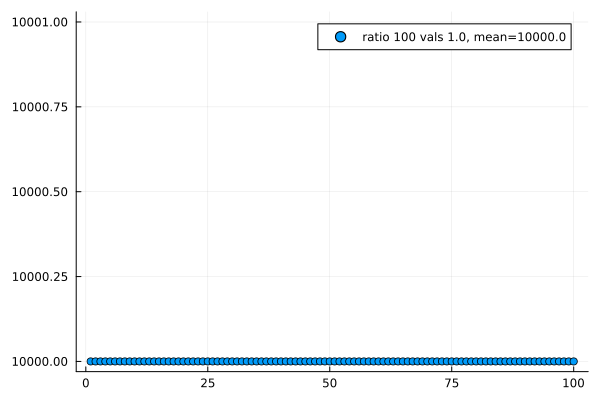

In [10]:
#他の数字でもやってみる。
#13種類のカードが3枚。3枚ずつ引く。打ち切りは10^4回
A = [fpp(13,3,10^4) for _=1:100]
B =  [A[i][1] for i = 1:100]

scatter(B,label="ratio 100 vals $(count(x -> x == 10^4 , B)/100), mean=$(mean(B))")

# 全部失敗。できない。

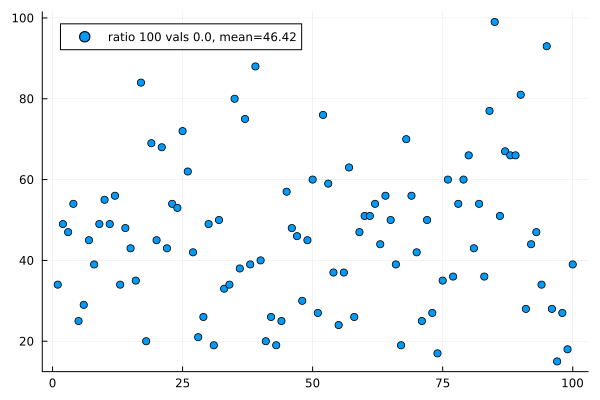

In [11]:
#他の数字でもやってみる。
#7種類のカードが3枚。3枚ずつ引く。打ち切りは10^4回
A = [fpp(7,3,10^4) for _=1:100]
B =  [A[i][1] for i = 1:100]

scatter(B,label="ratio 100 vals $(count(x -> x == 10^4 , B)/100), mean=$(mean(B))")

# 全部成功

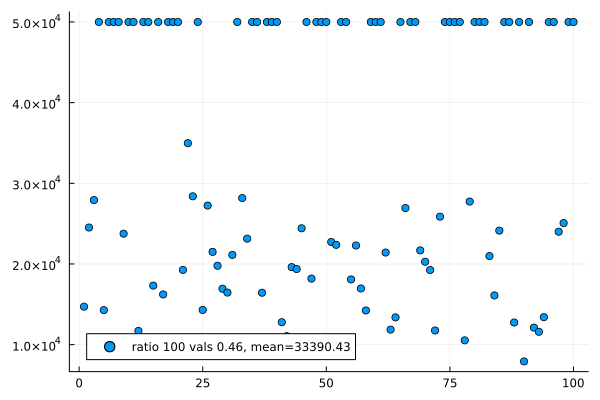

In [5]:
#21種類のカードが5枚。5枚ずつ引く。打ち切りは10^4回
A = [fpp(21,5,5*10^4) for _=1:100]
B =  [A[i][1] for i = 1:100]

scatter(B,label="ratio 100 vals $(count(x -> x == 5*10^4 , B)/100), mean=$(mean(B))")

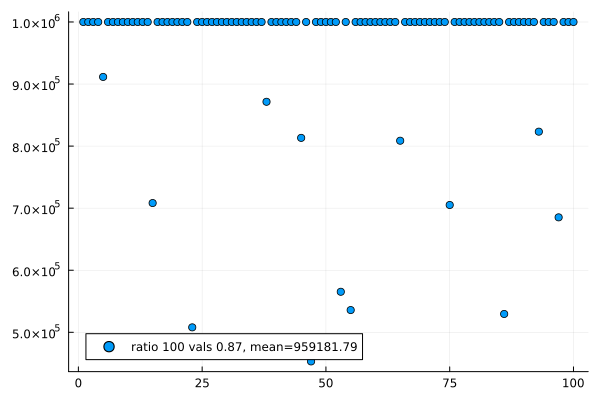

In [10]:
#31種類のカードが6枚。6枚ずつ引く。打ち切りは10^6回
A = [fpp(31,6,10^6) for _=1:100]
B =  [A[i][1] for i = 1:100]

scatter(B,label="ratio 100 vals $(count(x -> x == 10^6 , B)/100), mean=$(mean(B))")